# OC - P5 - Customer segmentation

## Context
Kaggle dataset 'Brazilian E-commerce Public Dataset (Olist)' : https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

## Ressources
https://www.nextlytics.com/blog/machine-learning-in-customer-segmentation-with-rfm-analysis

## Database
The database contains 9 flat files, csv format. For some they are similar to relationnal database table except for one of them that doesn't have a unicity of key.

## The need
It is asked to create  a study and a model that will help people undertanding the different types of the internet website's users.<br>
It is a marketing oriented analysis.

The segmentation have to be able to figure out at least the good customers from the other ones on a finance points of view, and also on a satisfaction point of view.

> It is asked to propose a model and a frequency of update of this very model.

The code has to respect the PEP8 convention.


In [9]:
import pandas as pd
import numpy as np
import datetime
pd.set_option('display.max_columns', 100)

import matplotlib.pyplot as plt
import seaborn as sns
import random
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn import preprocessing

from sklearn import decomposition
from sklearn import preprocessing

from sklearn.cluster import KMeans
from sklearn import cluster

ModuleNotFoundError: No module named 'xgb'

### Version

In [11]:
# Versions
print('Versions used:')
print('Python                : ' + sys.version)
print('NumPy                 : ' + np.version.full_version)
print('Pandas                : ' + pd.__version__)
print('Seaborn               : ' + sns.__version__)
print('Sklearn               : ' + sklearn.__version__)
now = datetime.datetime.now().isoformat()
print('Launched on             : ' + now)

Versions used:
Python                : 3.9.7 (default, Sep 16 2021, 08:50:36) 
[Clang 10.0.0 ]
NumPy                 : 1.20.3
Pandas                : 1.3.4
Seaborn               : 0.11.2
Sklearn               : 0.24.2


AttributeError: module 'random' has no attribute '__version__'

### Function declared

In [2]:
def ploting_distribution(df, columns_list, figure_size):
    """Function that plot the distirbution. Takes three arguments
        First : dataframe
        Second : un list of columns to plot
        Third the size of the plot format (x, y)
    """

    plt.figure(figsize = figure_size)
    i= 1
    for e in columns_list:
        plt.subplot(len(columns_list),2,i)
        sns.boxplot(x=df[e], width=0.5, color='#2E56D3')
        plt.title(f'Variable {e} boxlot')
        plt.ylabel('Value')
        plt.xlabel('')
        plt.title(f'Boxplot of variable : {e}')

        i += 1

        plt.subplot(len(columns_list),2,i)
        sns.histplot(x=df[e], kde=True, color='#2E56D3')
        plt.title(f'Variable {e} histplot')
        plt.xlabel('Value')
        plt.title(f'Histplot of variable : {e}')

        i += 1

    plt.suptitle(f'Distribution of the quantitative variables', fontsize=25, y=1.01)
    # plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
    plt.tight_layout()



###### Color font ######
s='''
    aliceblue, antiquewhite, aqua, aquamarine, azure,
    beige, bisque, black, blanchedalmond, blue,
    blueviolet, brown, burlywood, cadetblue,
    chartreuse, chocolate, coral, cornflowerblue,
    cornsilk, crimson, cyan, darkblue, darkcyan,
    darkgoldenrod, darkgray, darkgrey, darkgreen,
    darkkhaki, darkmagenta, darkolivegreen, darkorange,
    darkorchid, darkred, darksalmon, darkseagreen,
    darkslateblue, darkslategray, darkslategrey,
    darkturquoise, darkviolet, deeppink, deepskyblue,
    dimgray, dimgrey, dodgerblue, firebrick,
    floralwhite, forestgreen, fuchsia, gainsboro,
    ghostwhite, gold, goldenrod, gray, grey, green,
    greenyellow, honeydew, hotpink, indianred, indigo,
    ivory, khaki, lavender, lavenderblush, lawngreen,
    lemonchiffon, lightblue, lightcoral, lightcyan,
    lightgoldenrodyellow, lightgray, lightgrey,
    lightgreen, lightpink, lightsalmon, lightseagreen,
    lightskyblue, lightslategray, lightslategrey,
    lightsteelblue, lightyellow, lime, limegreen,
    linen, magenta, maroon, mediumaquamarine,
    mediumblue, mediumorchid, mediumpurple,
    mediumseagreen, mediumslateblue, mediumspringgreen,
    mediumturquoise, mediumvioletred, midnightblue,
    mintcream, mistyrose, moccasin, navajowhite, navy,
    oldlace, olive, olivedrab, orange, orangered,
    orchid, palegoldenrod, palegreen, paleturquoise,
    palevioletred, papayawhip, peachpuff, peru, pink,
    plum, powderblue, purple, red, rosybrown,
    royalblue, saddlebrown, salmon, sandybrown,
    seagreen, seashell, sienna, silver, skyblue,
    slateblue, slategray, slategrey, snow, springgreen,
    steelblue, tan, teal, thistle, tomato, turquoise,
    violet, wheat, white, whitesmoke, yellow,
    yellowgreen
    '''
color_font=s.split(',')
color_font=[l.replace('\n','') for l in color_font]
color_font=[l.replace(' ','') for l in color_font]
random.shuffle(color_font)
###### Color font ######

### Conclusion to the exploration and introduction to this particular notebook

We have cleaned and tested segmentation model in the previous notebook.

KMeans gives good result on a RFM point of view that's why we decide to choose this model as a production model.

> Here are the projection of R-F-M variables segmented with Kmeans and GMM
<br><br><br>

![alt text](assets/kmeans_clusters_3d.png "Title")

![alt text](assets/gmm_clusters_3d.png "Title")

> We saw that GMM is giving a good result creating 3 main clusters of customers


### Let's see how the models performance are reacting to new datas

Fist we'll need to create a set of main datas for our first model at a time t, and then create a second set that will feed our main model.

I'll use train test split for this purpose and the scoring method used will be the Rand index adjusted.

THe rand index adjusted is computes a similarity measure between two different clusterings by considering all pairs of samples, and counting pairs that are assigned in the same or different clusters predicted, against the true clusterings, adjusting for random chance.

In [3]:
### import database
df = pd.read_csv('olist_dataset_cleaned.csv')
df_rfm_modeled = pd.read_csv('rfm_modeled.csv')

With regard the exercice, we'll need to split the dataset cleaned into two parts one until end 2017 and the other form there.

In [4]:
df['order_purchase_timestamp'].min()

'2017-01-31 00:11:36'

In [5]:
def pipe_transfo(df, dateto, datemain):

    df_from_to_main = df[df['order_purchase_timestamp']<=datemain]
    df_from_to_test = df[df['order_purchase_timestamp']<=dateto]
    
    ###MAIN DATASET
    #frequency
    df_gb_customer_order_main = df_from_to_main.groupby(['customer_unique_id', 'order_id']).sum().reset_index()
    df_gb_customer_order_main = df_gb_customer_order_main.groupby('customer_unique_id').count().sort_values(by='price', ascending=False).reset_index()

    df_rfm = df_gb_customer_order_main[['customer_unique_id', 'order_id']] #order_id stands for the count of transactions per cusomer_unique_id here

    #monetary
    df_monetary = df_from_to_main.groupby('customer_unique_id').mean().reset_index()[['customer_unique_id', 'price']]
    df_rfm = df_rfm.merge(df_monetary, on='customer_unique_id', how='left')

    #recency
    df_recency = df_from_to_main.sort_values('order_purchase_timestamp', ascending=False)
    df_recency = df_recency.drop_duplicates(subset='customer_unique_id', keep='first')
    df_recency[['customer_unique_id', 'order_purchase_timestamp']]
    df_recency['reference_date'] = dateto
    df_recency['reference_date'] = df_recency['reference_date'].astype('datetime64[ns]')
    df_recency['Recency'] = df_recency['reference_date'] - df['order_purchase_timestamp'].astype('datetime64[ns]')
    df_recency['Recency'] = df_recency['Recency'].dt.days
    df_recency = df_recency[['customer_unique_id', 'Recency']]
    df_rfm = df_rfm.merge(df_recency, how='left', on='customer_unique_id')

    #cosmetic renaming
    df_rfm.rename(columns={'order_id':'Frequency', 'price':'Monetary'}, inplace=True)

    #adding customer review
    df_rfm_augmented_main = df_rfm.merge(df.groupby('customer_unique_id').mean().reset_index()[['customer_unique_id','review_score']], on='customer_unique_id', how='left')
    df_rfm_augmented_main = df_rfm_augmented_main.dropna()



    ###TEST DATASET
    #frequency
    df_gb_customer_order_test = df_from_to_test.groupby(['customer_unique_id', 'order_id']).sum().reset_index()
    df_gb_customer_order_test = df_gb_customer_order_test.groupby('customer_unique_id').count().sort_values(by='price', ascending=False).reset_index()

    df_rfm = df_gb_customer_order_test[['customer_unique_id', 'order_id']] #order_id stands for the count of transactions per cusomer_unique_id here

    #monetary
    df_monetary = df_from_to_test.groupby('customer_unique_id').mean().reset_index()[['customer_unique_id', 'price']]
    df_rfm = df_rfm.merge(df_monetary, on='customer_unique_id', how='left')

    #recency
    df_recency = df_from_to_test.sort_values('order_purchase_timestamp', ascending=False)
    df_recency = df_recency.drop_duplicates(subset='customer_unique_id', keep='first')
    df_recency[['customer_unique_id', 'order_purchase_timestamp']]
    df_recency['reference_date'] = dateto
    df_recency['reference_date'] = df_recency['reference_date'].astype('datetime64[ns]')
    df_recency['Recency'] = df_recency['reference_date'] - df['order_purchase_timestamp'].astype('datetime64[ns]')
    df_recency['Recency'] = df_recency['Recency'].dt.days
    df_recency = df_recency[['customer_unique_id', 'Recency']]
    df_rfm = df_rfm.merge(df_recency, how='left', on='customer_unique_id')

    #cosmetic renaming
    df_rfm.rename(columns={'order_id':'Frequency', 'price':'Monetary'}, inplace=True)

    #adding customer review
    df_rfm_augmented_test = df_rfm.merge(df.groupby('customer_unique_id').mean().reset_index()[['customer_unique_id','review_score']], on='customer_unique_id', how='left')
    df_rfm_augmented_test = df_rfm_augmented_test.dropna()



    return df_rfm_augmented_main, df_rfm_augmented_test

### Model pipeline creation for Kmeans

In [6]:
def model_kmeans_pipeline(df_main, df_test):
    columns_to_transform = df_main.drop(columns=['customer_unique_id']).columns

    ###MAIN
    preprocessor = ColumnTransformer(transformers=[("Scaler", preprocessing.StandardScaler(), columns_to_transform)])
    #kmeans_model_pipe = Pipeline(steps=[("preprocessor", preprocessor),("pca", decomposition.PCA(n_components=4)), ("clustering", KMeans(n_clusters=5, random_state=5))])
    kmeans_model_pipe = Pipeline(steps=[("preprocessor", preprocessor),("clustering", KMeans(n_clusters=5, random_state=5))])
    kmeans_model_main = kmeans_model_pipe.fit(df_main.drop(columns=['customer_unique_id']))

    ###TEST
    preprocessor = ColumnTransformer(transformers=[("Scaler", preprocessing.StandardScaler(), columns_to_transform)])
    #kmeans_model_pipe = Pipeline(steps=[("preprocessor", preprocessor),("pca", decomposition.PCA(n_components=4)), ("clustering", KMeans(n_clusters=5, random_state=5))])
    kmeans_model_pipe = Pipeline(steps=[("preprocessor", preprocessor),("clustering", KMeans(n_clusters=5, random_state=5))])
    kmeans_model_test = kmeans_model_pipe.fit(df_test.drop(columns=['customer_unique_id']))

    return kmeans_model_main, kmeans_model_test

> all time to date

In [7]:
df_rfm_main, df_rfm_test= pipe_transfo(df, '2018-08-31', '2018-08-31')

In [8]:
print(df_rfm_main.shape, df_rfm_test.shape)

(90803, 5) (90803, 5)


In [9]:
#clustering
kmeans_model_main, kmeans_model_test = model_kmeans_pipeline(df_rfm_main, df_rfm_test)
df_rfm_main['KMeans_labels_main_'] = kmeans_model_main['clustering'].labels_
df_rfm_test['KMeans_labels_test_'] = kmeans_model_test['clustering'].labels_

### Test via rand index

We are about to test the last part of the year VS the global model for customers in common in both datasets.

In [10]:
df_rfm_modeled_to_compare = df_rfm_main[df_rfm_main['customer_unique_id'].isin(df_rfm_test['customer_unique_id'])]
df_rfm_test_to_compare = df_rfm_test[df_rfm_test['customer_unique_id'].isin(df_rfm_main['customer_unique_id'])]
print(df_rfm_modeled_to_compare.shape, df_rfm_test.shape)

(90803, 6) (90803, 6)


In [11]:
adjusted_rand_score(df_rfm_modeled_to_compare.sort_values(by='customer_unique_id')['KMeans_labels_main_'], df_rfm_test.sort_values(by='customer_unique_id')['KMeans_labels_test_'])

1.0

-> OK the calculation is functional on the whole dataset

> bi monthly maintenant contract every 15 days

In [12]:
testing_date_list = ['2018-01-01', '2018-01-15', '2018-01-31', '2018-02-15', '2018-02-28', '2018-03-15', '2018-03-31', '2018-04-15', '2018-04-30', '2018-05-15', '2018-05-31', '2018-06-15', '2018-06-30', '2018-07-15', '2018-07-31']
rand_list = []
date_list = []

for e in testing_date_list:
    df_rfm_main, df_rfm_test = pipe_transfo(df, e, '2018-01-01')
    kmeans_model_main, kmeans_model_test = model_kmeans_pipeline(df_rfm_main, df_rfm_test)
    df_rfm_main['KMeans_labels_main_bim'] = kmeans_model_main['clustering'].labels_
    df_rfm_test['KMeans_labels_test_bim'] = kmeans_model_test['clustering'].labels_
    df_rfm_modeled_to_compare = df_rfm_main[df_rfm_main['customer_unique_id'].isin(df_rfm_test['customer_unique_id'])]
    df_rfm_test_to_compare = df_rfm_test[df_rfm_test['customer_unique_id'].isin(df_rfm_main['customer_unique_id'])]
    ari = adjusted_rand_score(df_rfm_modeled_to_compare.sort_values(by='customer_unique_id')['KMeans_labels_main_bim'], df_rfm_test_to_compare.sort_values(by='customer_unique_id')['KMeans_labels_test_bim'])
    rand_list.append(ari)
    date_list.append(f"{datetime.datetime.strptime(e, '%Y-%m-%d').day}-{datetime.datetime.strptime(e, '%Y-%m-%d').month}")

rand_df = pd.DataFrame({'Date': date_list, 'Rand_score': rand_list})

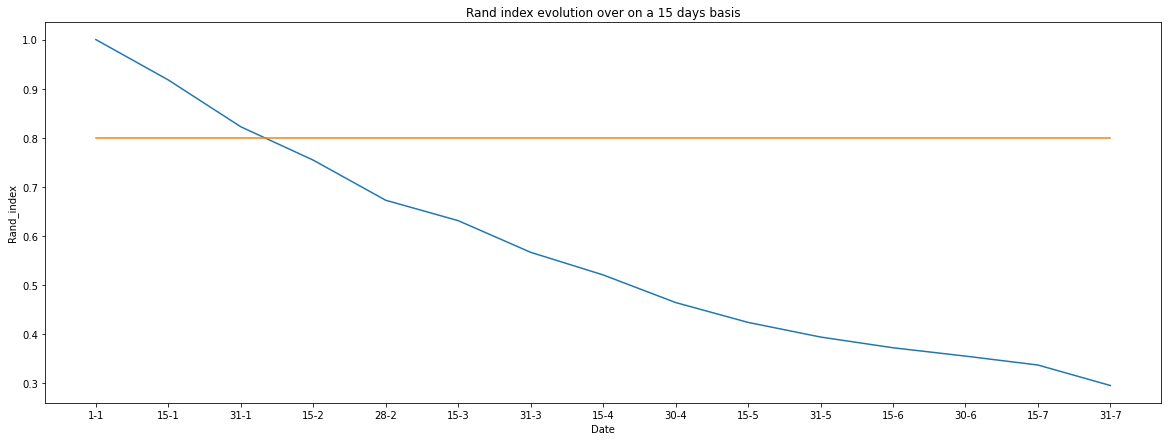

In [13]:
plt.figure(figsize=(20, 7))
plt.plot(rand_df.Date,rand_df['Rand_score'])
plt.title('Rand index evolution over on a 15 days basis')
plt.xlabel('Date')
plt.ylabel('Rand_index')
plt.plot(['1-1', '31-7'], [0.8, 0.8])
plt.show()

We can see that over a month the rand index is seemingly beeing too much deprecated. It s around 0,1 per 15 days of deprecation loss.
We should consider a 15 days maintenance contract.